# Exploratory Data Analisys about goals in the Brazilian Championship

Analysis on the occurrence of goals in the Brazilian championship of series A and B (2006-2015).

## Working the dataset

The initial dataset contains the following attributes:
* **championship_name: **The name and year of championship
* **year: **Year of championship
* **home_team: **The name of home team *(unique name)*
* **away_team: **The name of away team *(unique name)*
* **goals_home: **The number of goals of home team
* **goals_away: **The number of goals of away team
* **round_num: **The round of the match
* **match_date: **The date of the match
* **column_result: **The result of match *(0-home winner | 1- draw | 2-away winner)*

Initially, we will create some new columns that will be used in our analysis:
* **total_goals**: The total of goals in match
* **championship**: The name of championship *(**championship_name** without year)*


In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot') #style of plots

#to plot in this notebook
%matplotlib inline

In [91]:
#reading the dataframe
df = pd.read_csv("matches.csv") 

#filling new columns
df['total_goals'] = df.goals_away + df.goals_home
df['championship'] = np.where(df['championship_name'].str.contains('a'),'serie A','serie B')

df.head()

,championship_name,year,home_team,away_team,goals_home,goals_away,round_num,match_date,column_result,total_goals,championship
0,serie-a-2006,2006,Vasco,Internacional,1,1,1,2006-04-15,1,2,serie A
1,serie-a-2006,2006,Juventude,Parana,1,0,1,2006-04-15,0,1,serie A
2,serie-a-2006,2006,Gremio,Corinthians,2,0,1,2006-04-16,0,2,serie A
3,serie-a-2006,2006,Santa Cruz,Figueirense,0,0,1,2006-04-16,1,0,serie A
4,serie-a-2006,2006,Atletico-PR,Fluminense,1,2,1,2006-04-16,2,3,serie A


## Goals x Matches

Inicialmente, verificaremos a distribuição da quantidade de gols por partida nos dois campeonatos.

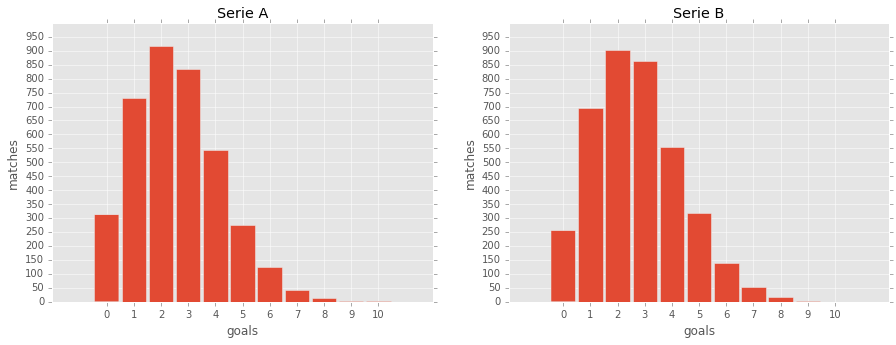

In [93]:
#function to set params of histogram
def plotHist(plot, series, bins, title, xticks, yticks, xlabel, ylabel):
    plot.hist(series, bins=bins, rwidth=0.9, align='left')
    plot.set_title(title)
    plot.set_xticks(xticks)
    plot.set_yticks(yticks)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)

goalsA = df[df.championship == 'serie A']['total_goals'] #array of goals in serie A
goalsB = df[df.championship == 'serie B']['total_goals'] #array of goals in serie B

#create a figure with 1 row and 2 columns to histogram
fig, (serieA, serieB) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)

#ploting histograms
bins= np.arange(0,12)
xticks= np.arange(0,11)
yticks= np.arange(0,1000,50)
xlabel= 'goals'
ylabel= 'matches'
plotHist(serieA, goalsA, bins, 'Serie A',xticks,yticks,xlabel,ylabel)
plotHist(serieB, goalsB, bins, 'Serie B',xticks,yticks,xlabel,ylabel)
plt.show()

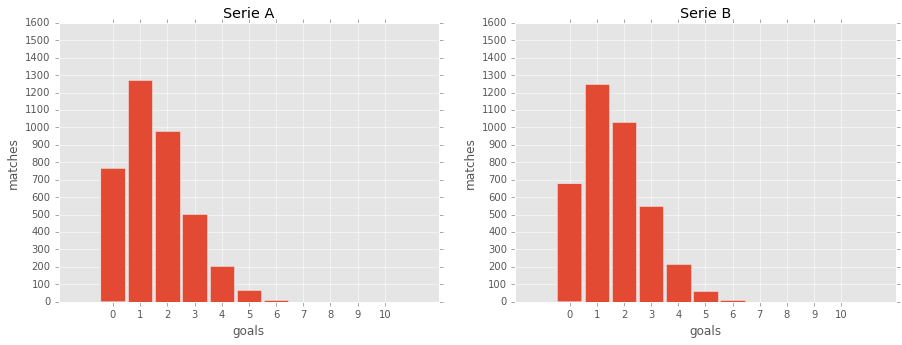

In [103]:
goalsA = df[df.championship == 'serie A']['goals_home'] #array of goals in serie A
goalsB = df[df.championship == 'serie B']['goals_home'] #array of goals in serie B

fig, (serieA, serieB) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)

#ploting histograms
bins= np.arange(0,12)
xticks= np.arange(0,11)
yticks= np.arange(0,1700,100)
xlabel= 'goals'
ylabel= 'matches'
plotHist(serieA, goalsA, bins, 'Serie A',xticks,yticks,xlabel,ylabel)
plotHist(serieB, goalsB, bins, 'Serie B',xticks,yticks,xlabel,ylabel)
plt.show()

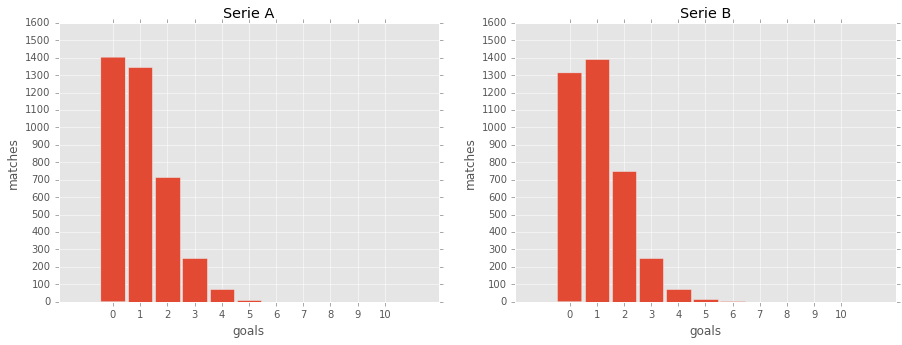

In [104]:
goalsA = df[df.championship == 'serie A']['goals_away'] #array of goals in serie A
goalsB = df[df.championship == 'serie B']['goals_away'] #array of goals in serie B

fig, (serieA, serieB) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)

#ploting histograms
bins= np.arange(0,12)
xticks= np.arange(0,11)
yticks= np.arange(0,1700,100)
xlabel= 'goals'
ylabel= 'matches'
plotHist(serieA, goalsA, bins, 'Serie A',xticks,yticks,xlabel,ylabel)
plotHist(serieB, goalsB, bins, 'Serie B',xticks,yticks,xlabel,ylabel)
plt.show()

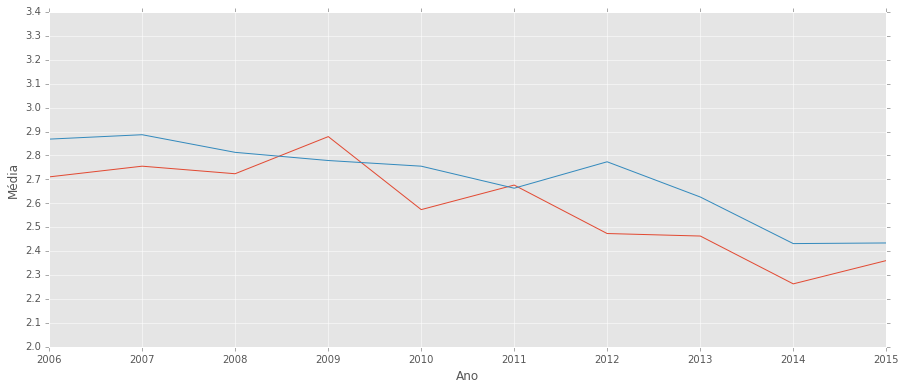

In [4]:
meanByChampA = df[df.championship == 'serie A']
meanByChampA = meanByChampA.groupby(meanByChampA['year'])
meanByChampA = meanByChampA['total_goals'].mean()
meanByChampA.index = pd.to_datetime(meanByChampA.index,format='%Y')

meanByChampB = df[df.championship == 'serie B']
meanByChampB = meanByChampB.groupby(meanByChampB['year'])
meanByChampB = meanByChampB['total_goals'].mean()
meanByChampB.index = pd.to_datetime(meanByChampB.index,format='%Y')

def plotSeries(plot, seriesA, seriesB, title, xticks, yticks, xlabel, ylabel):
    plot.plot(seriesA)
    plot.plot(seriesB)
    plot.set_xticks(xticks)
    plot.set_yticks(yticks)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    
fig, (tg) = plt.subplots(1,1)
fig.set_figwidth(15)
fig.set_figheight(6)
yticks= np.arange(2,3.5,0.1)
xticks= np.arange(2006,2016,1)
xticks = pd.to_datetime(xticks,format='%Y')

plotSeries(tg, meanByChampA, meanByChampB,'Médias de Gols',xticks,yticks, 'Ano', 'Média')

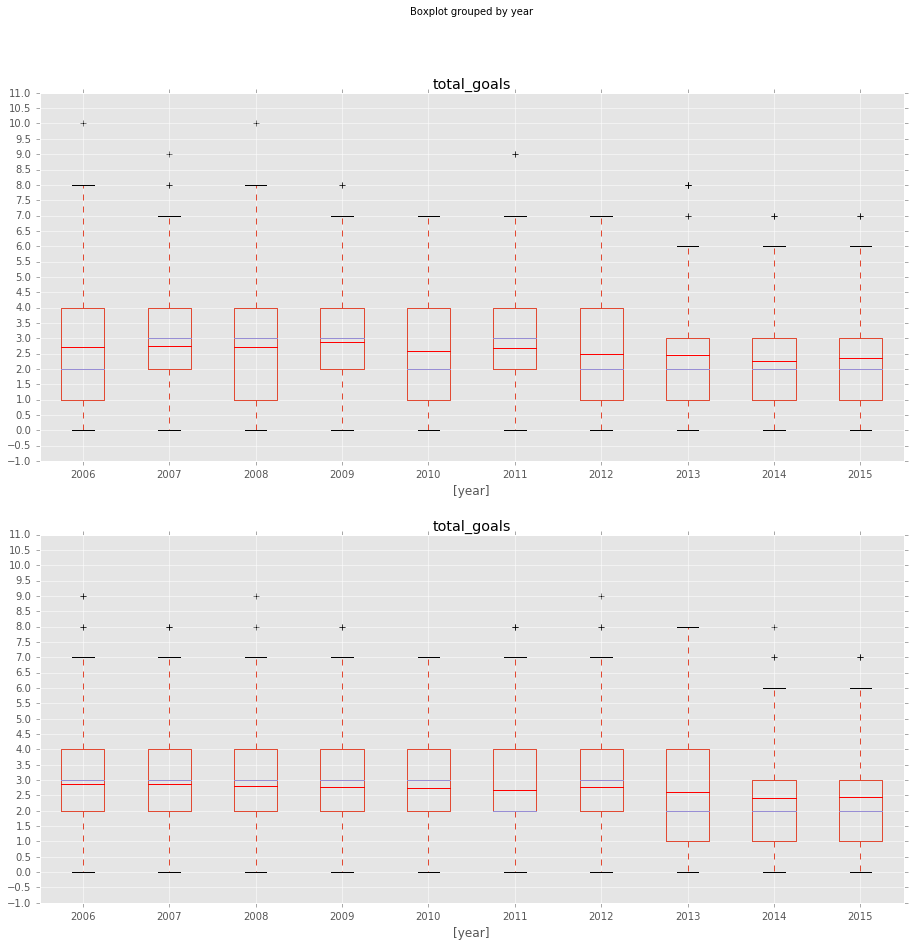

In [90]:
goalsA = df[df.championship == 'serie A']
goalsA = goalsA[['year','total_goals']]

goalsB = df[df.championship == 'serie B']
goalsB = goalsB[['year','total_goals']]

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figwidth(15)
fig.set_figheight(15)
yticks= np.arange(-1,11.5,0.5)

p1 = goalsA.boxplot(ax=ax1, by='year', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True)
p2 = goalsB.boxplot(ax=ax2, by='year', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True)

p1.set_yticks(yticks)
p2.set_yticks(yticks)
plt.show()

In [5]:
print(stats.shapiro(goalsA))
print(stats.shapiro(goalsB))

freqA = df[df.championship == 'serie A'].groupby(df.total_goals).total_goals.count()
freqB = df[df.championship == 'serie B'].groupby(df.total_goals).total_goals.count()

goalsHomeA = df[df.championship == 'serie A']['goals_home'] #array of goals in serie A
goalsHomeB = df[df.championship == 'serie B']['goals_home'] #array of goals in serie A
goalsAwayA = df[df.championship == 'serie A']['goals_away'] #array of goals in serie A
goalsAwayB = df[df.championship == 'serie B']['goals_away'] #array of goals in serie A

print(stats.mannwhitneyu(goalsHomeA,goalsAwayA))

rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

(0.9430341124534607, 5.5458774538237845e-36)
(0.9458440542221069, 2.8657008288768213e-35)
MannwhitneyuResult(statistic=5351270.0, pvalue=5.6499615953031492e-86)


Ttest_indResult(statistic=-0.019078351923737018, pvalue=0.98478241437220326)

TypeError: barh() missing 1 required positional argument: 'width'

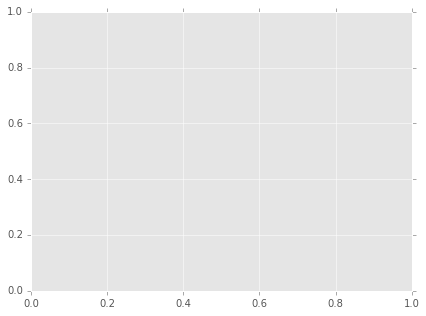

In [7]:
freqA = df[df.championship == 'serie A'].groupby(df.total_goals).total_goals.count()
freqB = df[df.championship == 'serie B'].groupby(df.total_goals).total_goals.count()
s = np.random.poisson(2.587895, 3600)
p = pd.Series(s)
p = p.value_counts()

freqB[10] = 0

stats.chisquare(freqB,freqA)

fig = plt.figure(1,figsize=[15,5])
plt.subplot(121)
plt.barh(goalsA)
plt.show()

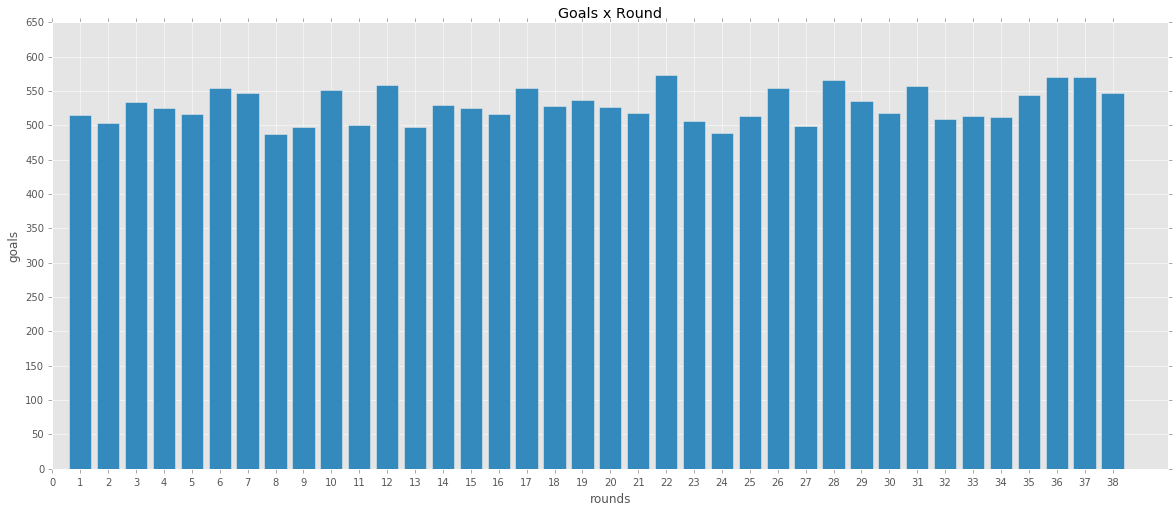

In [107]:
goalsByRound = df.groupby(df.round_num).total_goals.sum()
fig, plotGBR = plt.subplots(1,1)
fig.set_figwidth(20)
fig.set_figheight(8)
plotGBR.bar(goalsByRound.index, goalsByRound, align="center")
plotGBR.set_xticks(np.arange(0,39))
plotGBR.set_yticks(np.arange(0,700,50))
plotGBR.set_xlabel('rounds')
plotGBR.set_ylabel('goals')
plotGBR.set_title('Goals x Round')
plt.show()

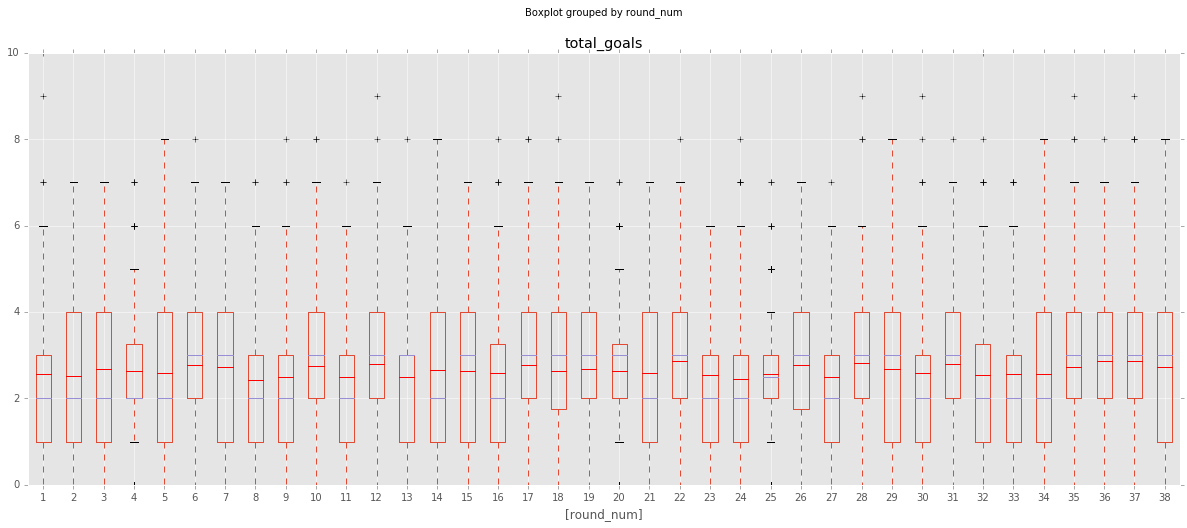

In [109]:
gbr = df[['round_num', 'total_goals']]
fig, plotGBR = plt.subplots(1,1)
fig.set_figwidth(20)
fig.set_figheight(8)
yticks= np.arange(-1,11.5,0.5)

p1 = gbr.boxplot(ax=plotGBR, by='round_num', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True)

In [ ]:
print(goalsByRound)

In [ ]:
print(gbr)

In [110]:
from scipy import stats
results = df[df.championship == 'serie A']['column_result']
stats.pearsonr(goalsAwayA,results)

(0.60819341920594672, 0.0)